# Final Project - Python Programming for Social Sciences

                                Submitted by Cosima Meyer 
                           (CDSS/GESS, University of Mannheim)

# Project motivation

## Background
Civil wars often host various actors &mdash; ranging from non-state actors, like rebel groups, to state actors, like the government of a country. Taking Syria's current civil war or Iraq's invasion in 2003 as recent and tragic examples, they illustrate the complexity of civil wars perfectly. Various pro-government, government(s), opposition, as well as terrorist groups pursue diverse goals while clashing every now and then against each other.<br />
Analyzing these violent patterns where I would either assume a cluster of violent interaction or dispersed patterns with less overlap in the violent groups is of high interest to better understand the complex nature of violent conflicts. 


## What is the dataset and the project about?
The dataset by UCDP provides fine-grained conflict data on various conflict groups (available in a dyadic format) in conflict zones worldwide. I intend to use the final project for the class "Python Programming for Social Sciences" as a first attempt to analyze the conflict groups in a network structure and to explore their relation to each other. <br />
Important to note, the relationships between the warring parties in this dataset are always of violent nature. This means that the relations show if two (or more actors) are fighting against each other with at least one battle-related death. I consider the networks first worldwide and then also region-wise. <br /> When it comes to the regions, I would assume a higher conflict density between the actors (i.e., greater clusters) in Sub-saharan Africa and the Middle East. Sub-saharan Africa is often described as one of the most conflict prone regions worldwide and conflicts often experience spillover effects that do not halt at a country's political border. The Middle East as a highly connected region itself is also likely to produce these spillover effects of violent actions. While this region has less actors than Sub-saharan Africa, I assume to find a more centralized network here. 

# Data preparation

## Load required packages
As a first step I loaded all required packages for my work with Python.

In [1]:
import networkx as nx
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from pprint import pprint
import csv
from operator import itemgetter
from networkx.algorithms import community

## Read the data
The data can be accessed via http://ucdp.uu.se/downloads/. The dataset is called "UCDP Georeferenced Event Dataset (GED) Global version 17.2 (2016)". It contains the most disaggregated data on individual events of organized violence with geo-coded references. While I do not need geo-coded references for my project for this class, the dataset contains the most up-to-date information provided by UCDP on organized violence. It is already organized as a dyadic dataset, presenting the violence committed per dyads. Both sides can be the government and/or non-state armed actors like rebel groups.

In [2]:
# Getting information on the working directory
os.getcwd()

'/Users/Cosima'

The dataset by UCDP is available in various formats, amongst others as a CSV-file. For loading it in Python, I used the function below. The function is leaned on the function that we wrote in class. While I adjusted the function to my need, the pre-defined function allows me to already assign edges and nodes. Moreover, since I had to run this command  for each (sub)dataset, it is the most convenient way to work efficiently.

In [3]:
def readconflict(datapath,data):
    '''Function for reading data'''
    count = 0
    G = nx.Graph(name=data) # define network
    for row in open(datapath + data + '.csv', 'U'):
        if count >0: 
            row = row.rstrip().split(',')
            # generate relations
            G.add_edge(row[1], row[3]) 
            # assign attributes (side_a)
            G.add_node(row[1], type='a')
            # add info on region for side_a
            G.add_node(row[1], region=row[7])
            # add info if actor is government for side_a
            G.add_node(row[1], state=row[5]) 
            # assign attributes (side_b)
            G.add_node(row[3], type='b') 
            # add info on region for side_b
            G.add_node(row[3], region=row[7]) 
            # add info if actor is government for side_a
            G.add_node(row[3], state=row[6]) 
        count += 1
    print 'Constructed network:\n{0}'.format(nx.info(G))
    return G # return network

In [4]:
# Use the function to read in worldwide data
B = readconflict(os.getcwd() + '/', 
                 'ged171_new')

Constructed network:
Name: ged171_new
Type: Graph
Number of nodes: 1159
Number of edges: 1181
Average degree:   2.0380


In [5]:
# Use the function to read in data on Sub-saharan Africa
B_africa = readconflict(os.getcwd() + '/', 
                        'ged171_new_africa')

Constructed network:
Name: ged171_new_africa
Type: Graph
Number of nodes: 689
Number of edges: 694
Average degree:   2.0145


In [6]:
# Use the function to read in data on the Middle East
B_me = readconflict(os.getcwd() + '/', 
                    'ged171_new_me')

Constructed network:
Name: ged171_new_me
Type: Graph
Number of nodes: 70
Number of edges: 86
Average degree:   2.4571


In [7]:
# Use the function to read in data on the Americas
B_americas = readconflict(os.getcwd() + '/', 
                          'ged171_new_americas')

Constructed network:
Name: ged171_new_americas
Type: Graph
Number of nodes: 109
Number of edges: 90
Average degree:   1.6514


In [8]:
# Use the function to read in data on Asia
B_asia = readconflict(os.getcwd() + '/', 
                      'ged171_new_asia')

Constructed network:
Name: ged171_new_asia
Type: Graph
Number of nodes: 254
Number of edges: 267
Average degree:   2.1024


In [9]:
# Use the function to read in data on Europe
B_europe = readconflict(os.getcwd() + '/', 
                        'ged171_new_europe')

Constructed network:
Name: ged171_new_europe
Type: Graph
Number of nodes: 79
Number of edges: 72
Average degree:   1.8228


In [10]:
# Use the function to read in data for Iraq
B_iraq = readconflict(os.getcwd() + '/',
                      'ged171_new_iraq')

Constructed network:
Name: ged171_new_iraq
Type: Graph
Number of nodes: 29
Number of edges: 33
Average degree:   2.2759


# Visualization
The following part is divided into several subparts. I first access a general overview of the relation between all conflict parties worldwide.<br />
In order to visualize the data, I use the spring layout. "k" controls the distance between the nodes and varies between 0 and 1 and the iterations is the number of times simulated annealing is run. The default values are k=0.1 with 50 iterations.<br />
Since I will use the same code for all visualizations, I wrote the function "plotnetworks" to do the job.

In [11]:
def plotnetworks(network,color):
    '''Function for plotting networks'''
    spring_pos = nx.spring_layout(network) # define the pos
    plt.figure(dpi=700) ; # increase the quality of the graphics
    plt.axis('off') ; # axis off
    # plot the network
    nx.draw_networkx(network,
                 pos = spring_pos,
                 width = 0.1, # decrease width of edges
                 with_labels = False, # no labels for the groups
                 node_color = str(color), # adds color to the network
                 node_size = 2) # adjusts the node size
    plt.show()

I also extended this function and wrote the function "plotnetworks_wl". It allows plotting the graphs with labels. This is a handy extension that helps me to visualize a region-specific (Middle East) and country-specific network (Iraq) below.

In [12]:
def plotnetworks_wl(network,color):
    '''Function for plotting networks'''
    spring_pos = nx.spring_layout(network) # define the pos
    plt.figure(dpi=700) ; # increase the quality of the graphics
    plt.axis('off') ; # axis off
    # plot the network
    nx.draw_networkx(network,
                 pos = spring_pos, 
                 width = 0.1, # decrease width of edges
                 with_labels = True, # labels for the groups
                 font_size=2.5, # set font size for labels 
                 node_color = str(color), # adds color to the network
                 node_size = 0.5) # adjusts the node size 
            # (make it smaller so that labels are better visualized)
    plt.show()

## All conflict parties worldwide

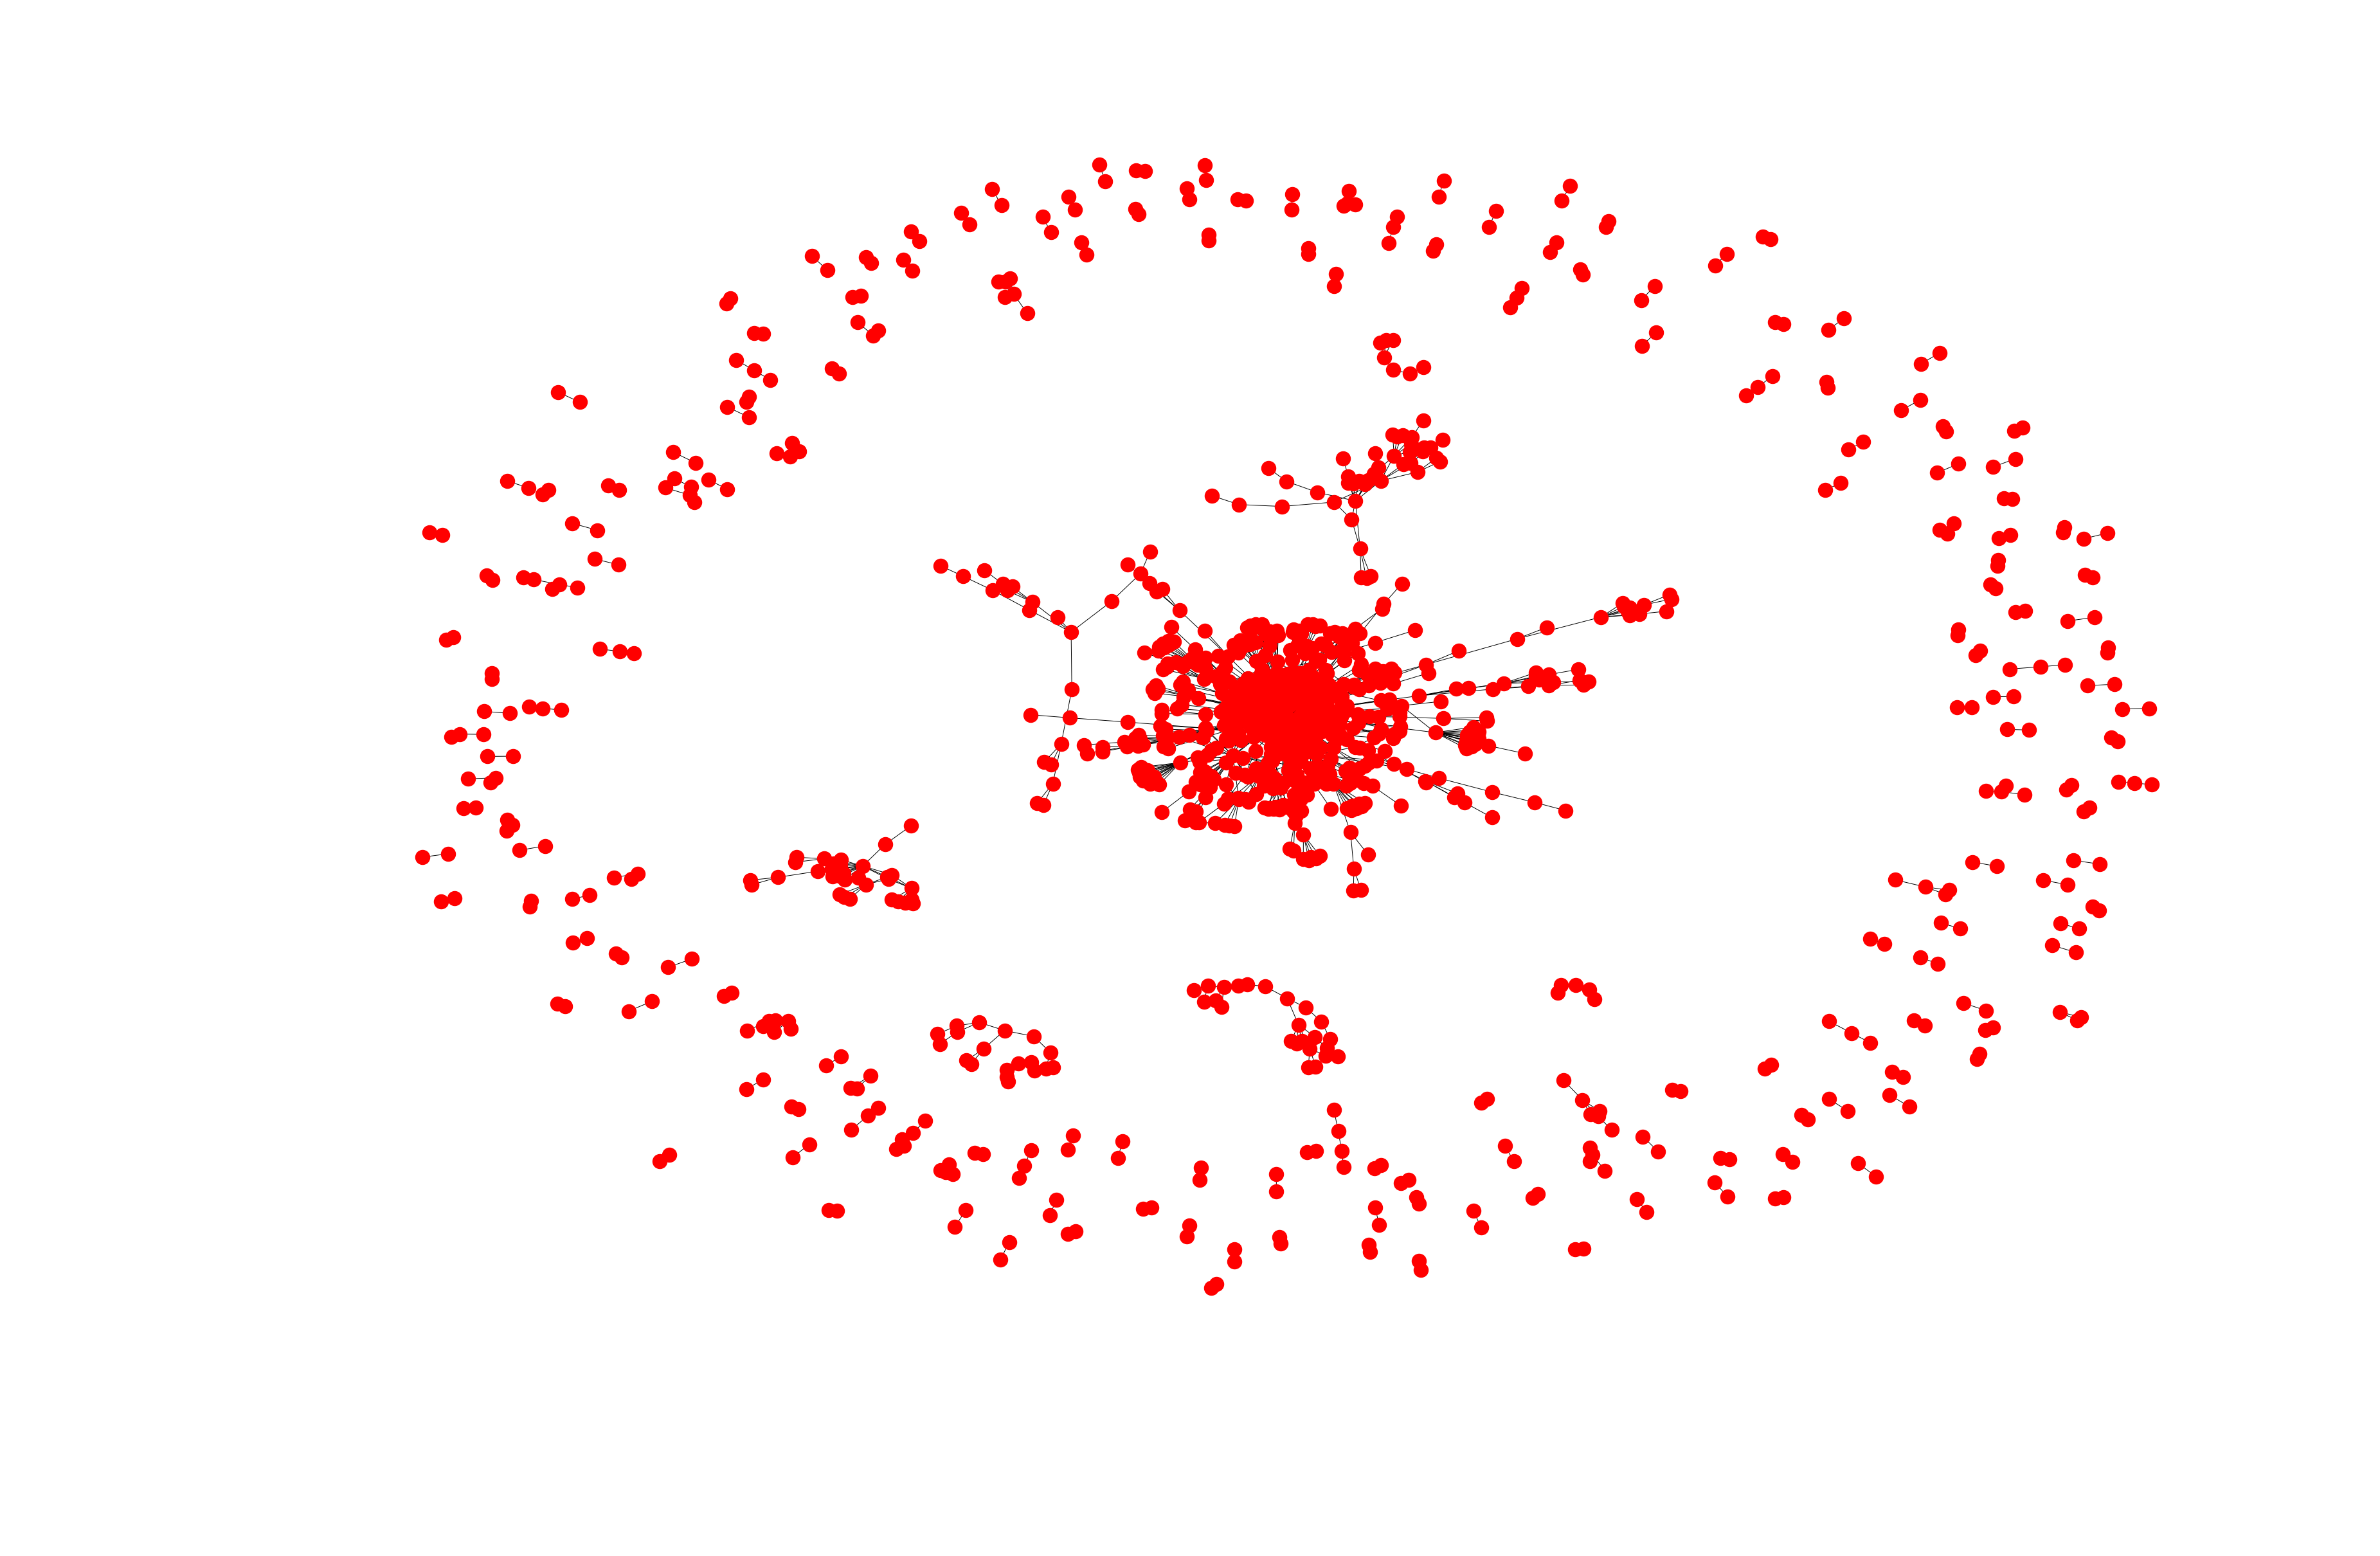

In [13]:
# plot networks for all conflict parties worldwide
plotnetworks(B,'red')

The network shows a cluster of fighting units in the center and several single fighting dyads or triads at the border. In order to identify how and in particular where (geographically) these fighting units are connected, I further disaggregated the data into five geographical regions: 1) Sub-saharan Africa, 2) Middle East, 3) Asia, 4) Americas, and 5) Europe. These regions are analyzed below.

## Region-wise

### Sub-saharan Africa

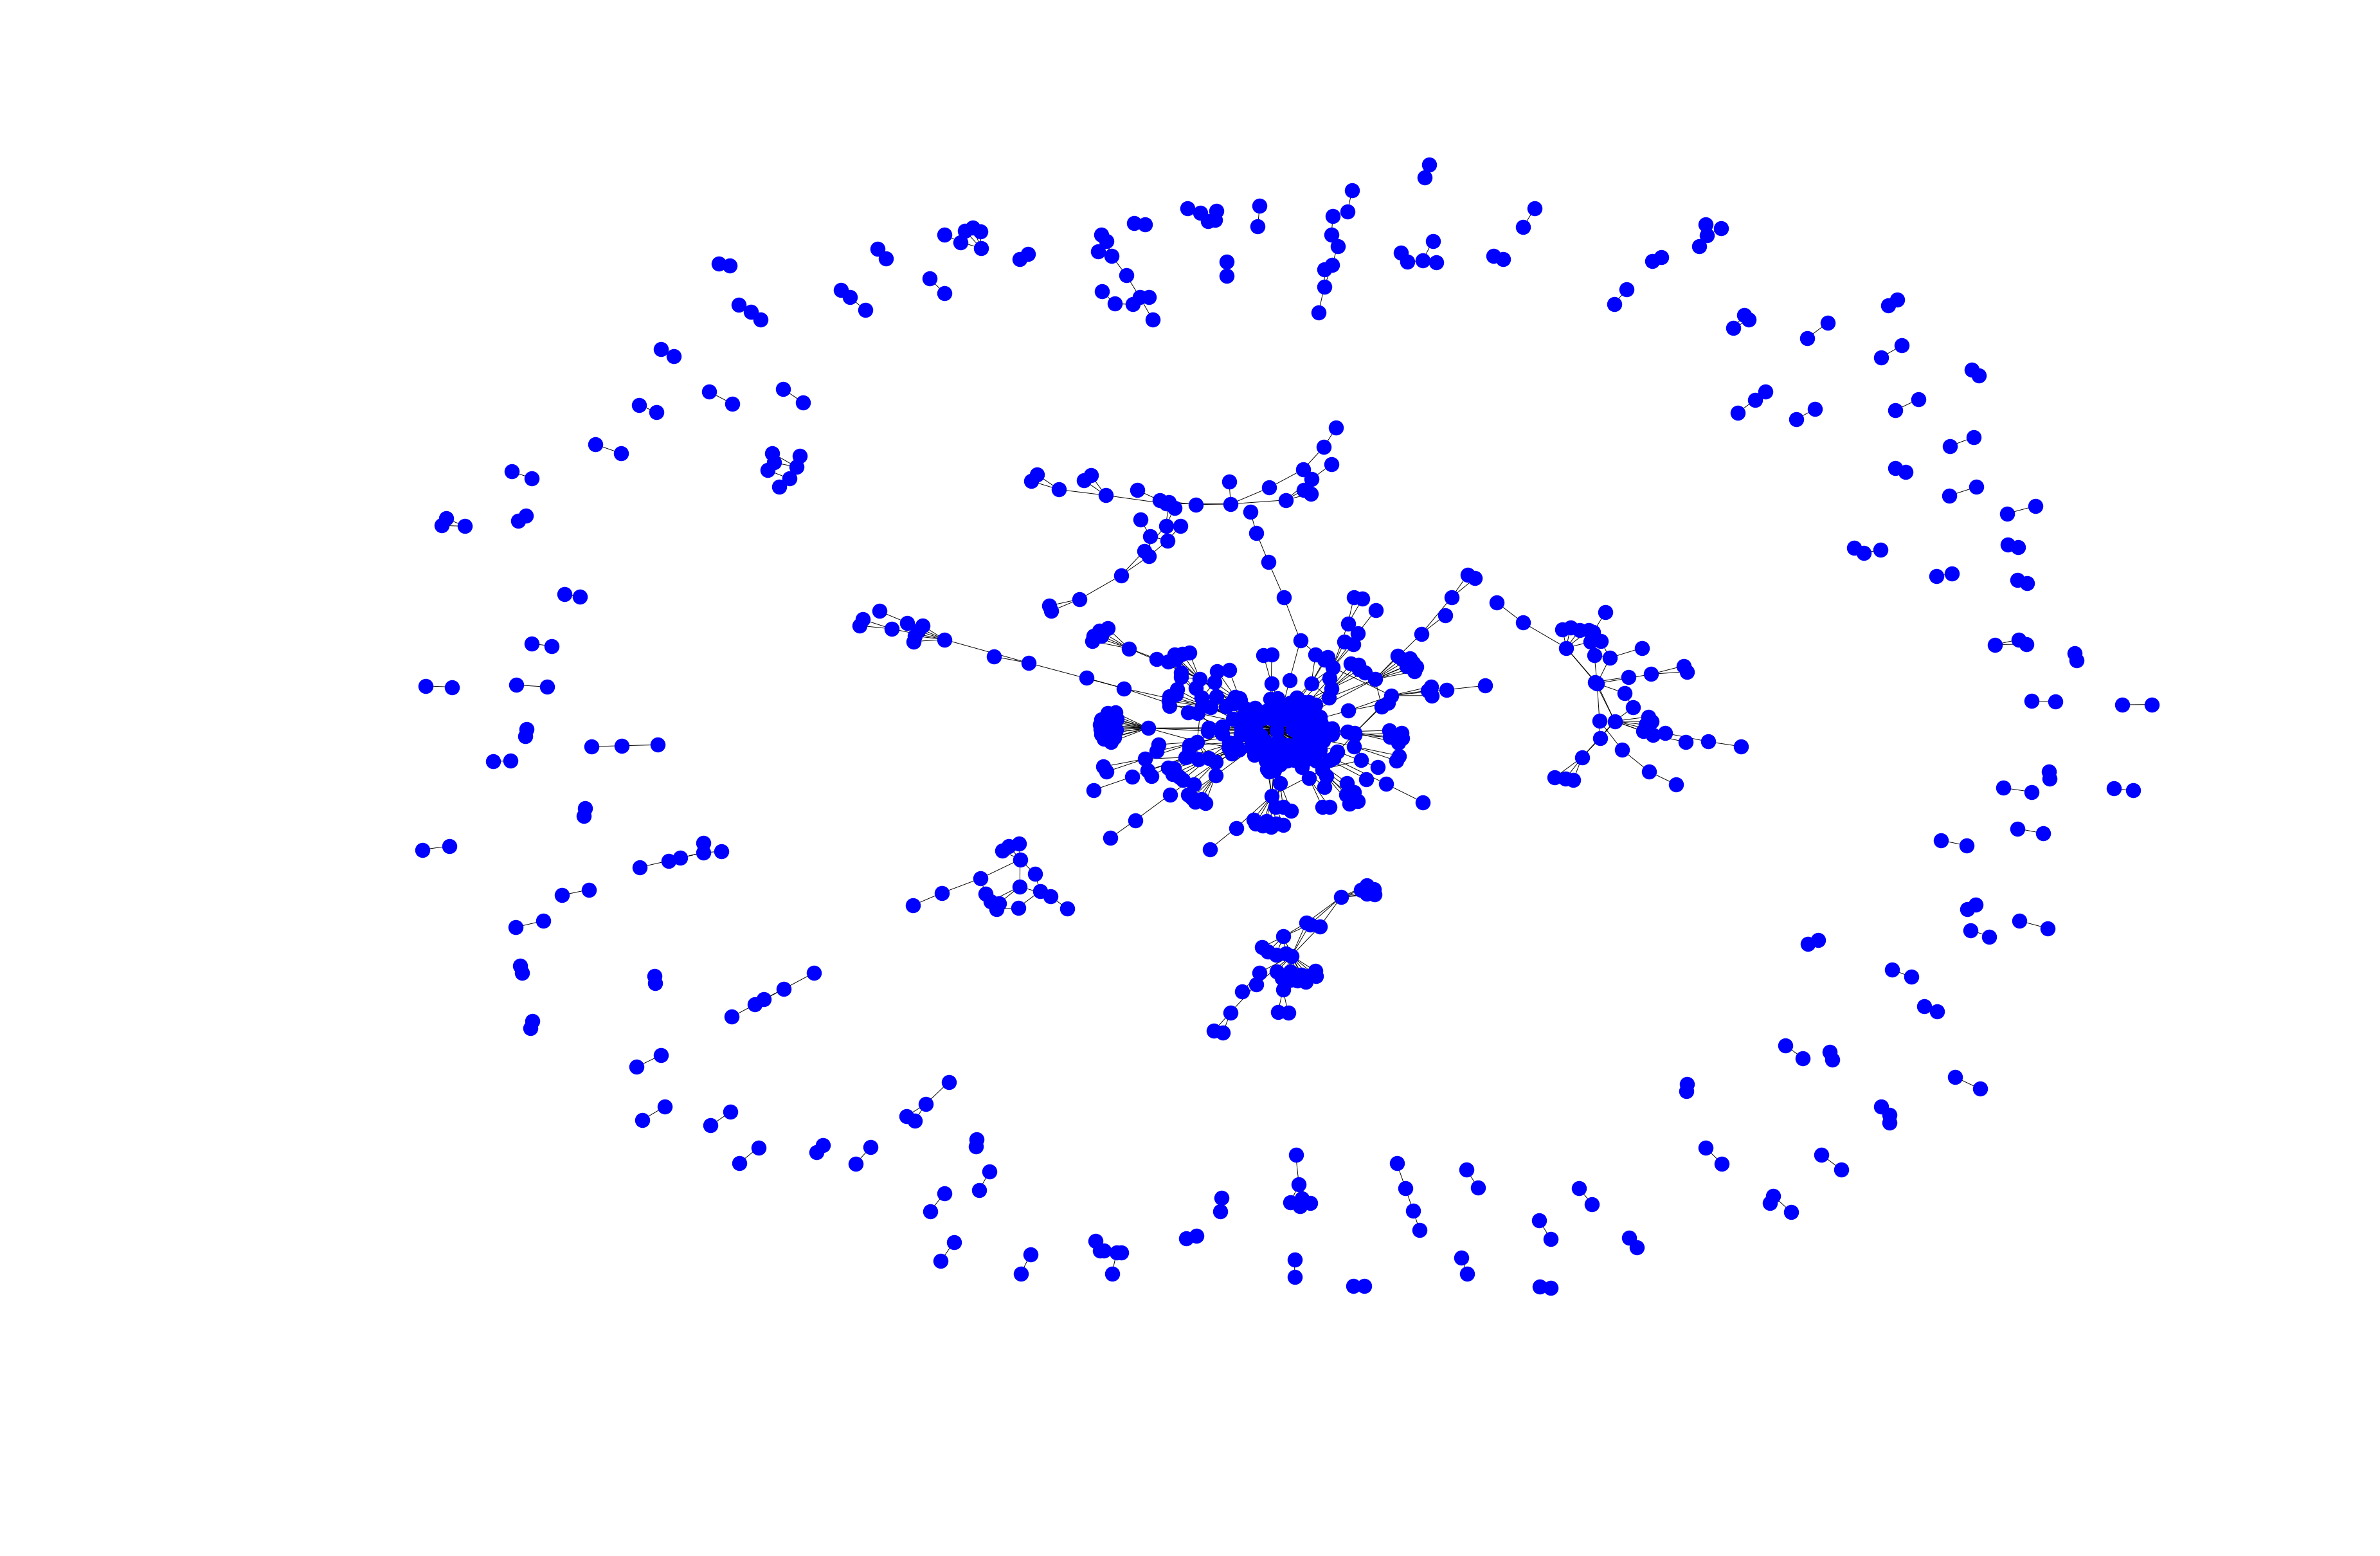

In [14]:
# plot networks for conflict parties in Africa
plotnetworks(B_africa,'blue')

The network for the fighting units in Sub-saharan Africa highly resembles the worldwide network. It also shows an accumulation of actors in the center which have several fighting relations and some warring actors at the border which form at least a dyad. <br />
The similar patterns shows that the Sub-saharan African countries, which are often described as part of the most conflict ridden region worldwide (Gérad Prunier, 2011), may drive or bias the pattern in the worldwide network. 

### Middle East

As a next step, I consider the Middle East which is, according to UCDP, also one of the most deadly regions in the world.

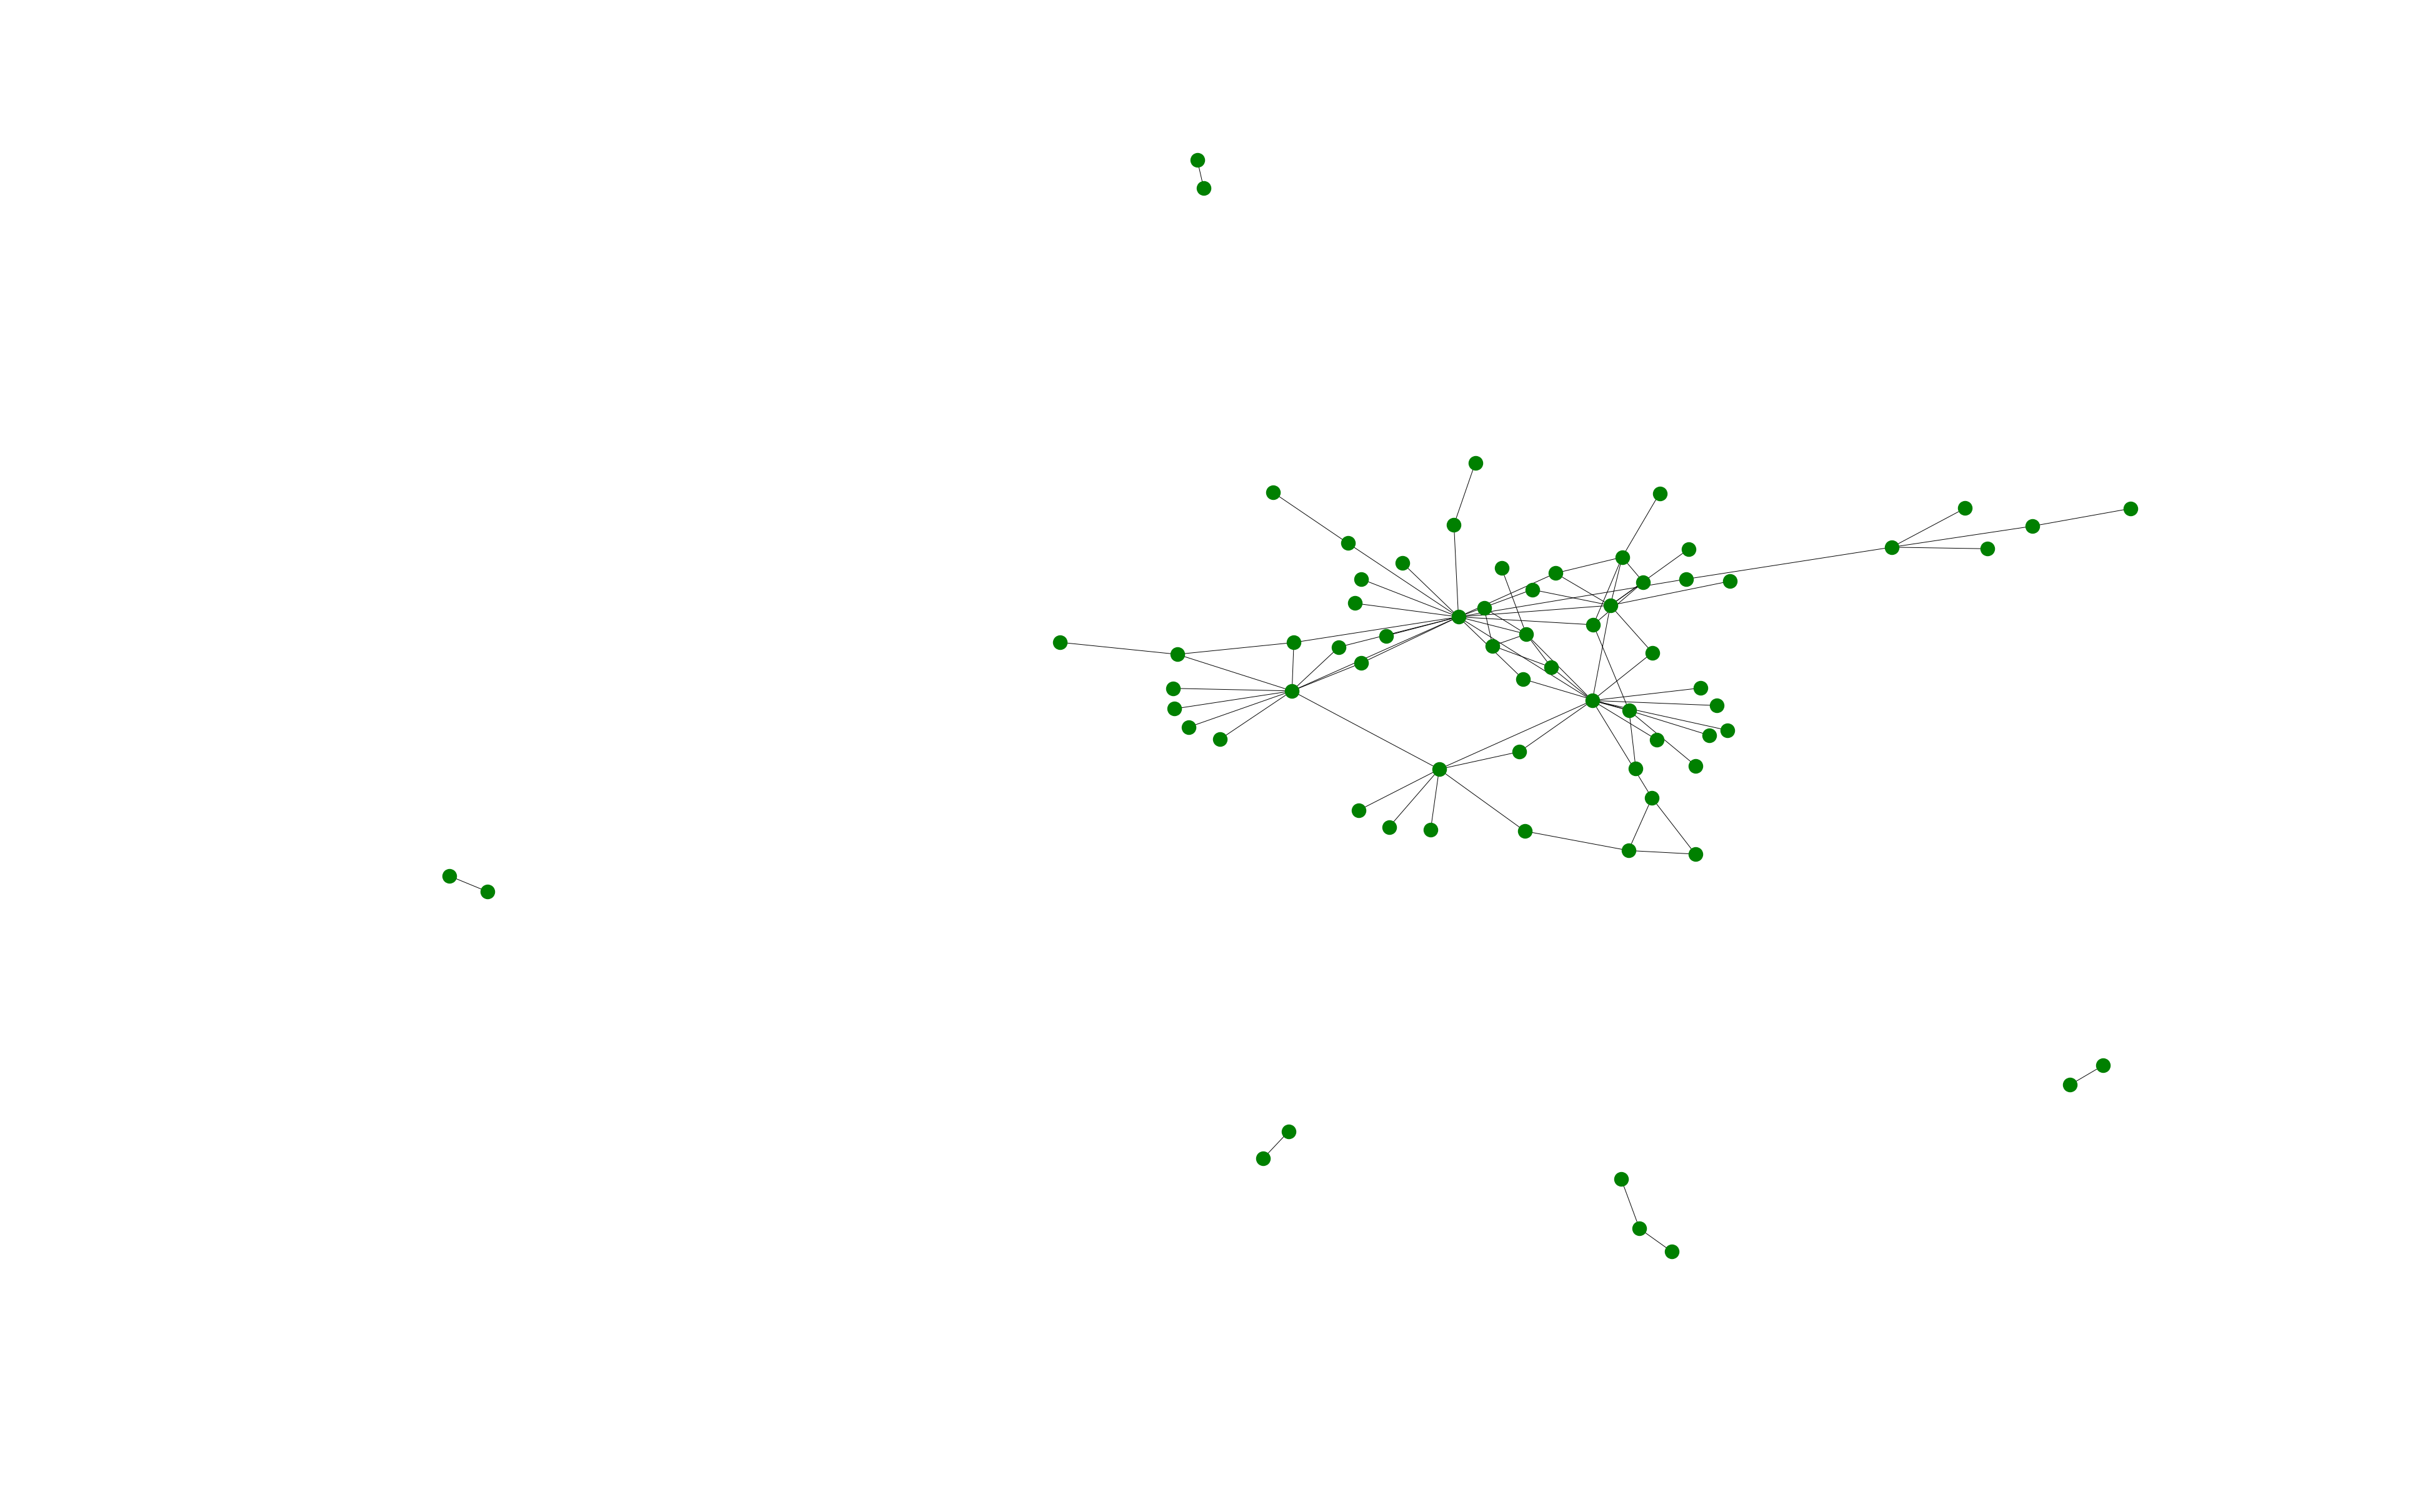

In [15]:
# plot networks for conflict parties in the Middle East
plotnetworks(B_me,'green') 

As assumed in the beginning, I find a different network pattern. This network shows less actors than the first two networks. At the same time, these actors enjoy a high overlap in relationships with each other. While I can only derive from the networks, the network of the Middle Eastern networks points towards high(er) internal struggle among the actors. <br />
This would be an interesting starting point for future research which should also consider the degree of cooperation between the warring actors.<br />
To further analyze this patter, I added the labels of the conflict groups to it in order to identify some central actors.

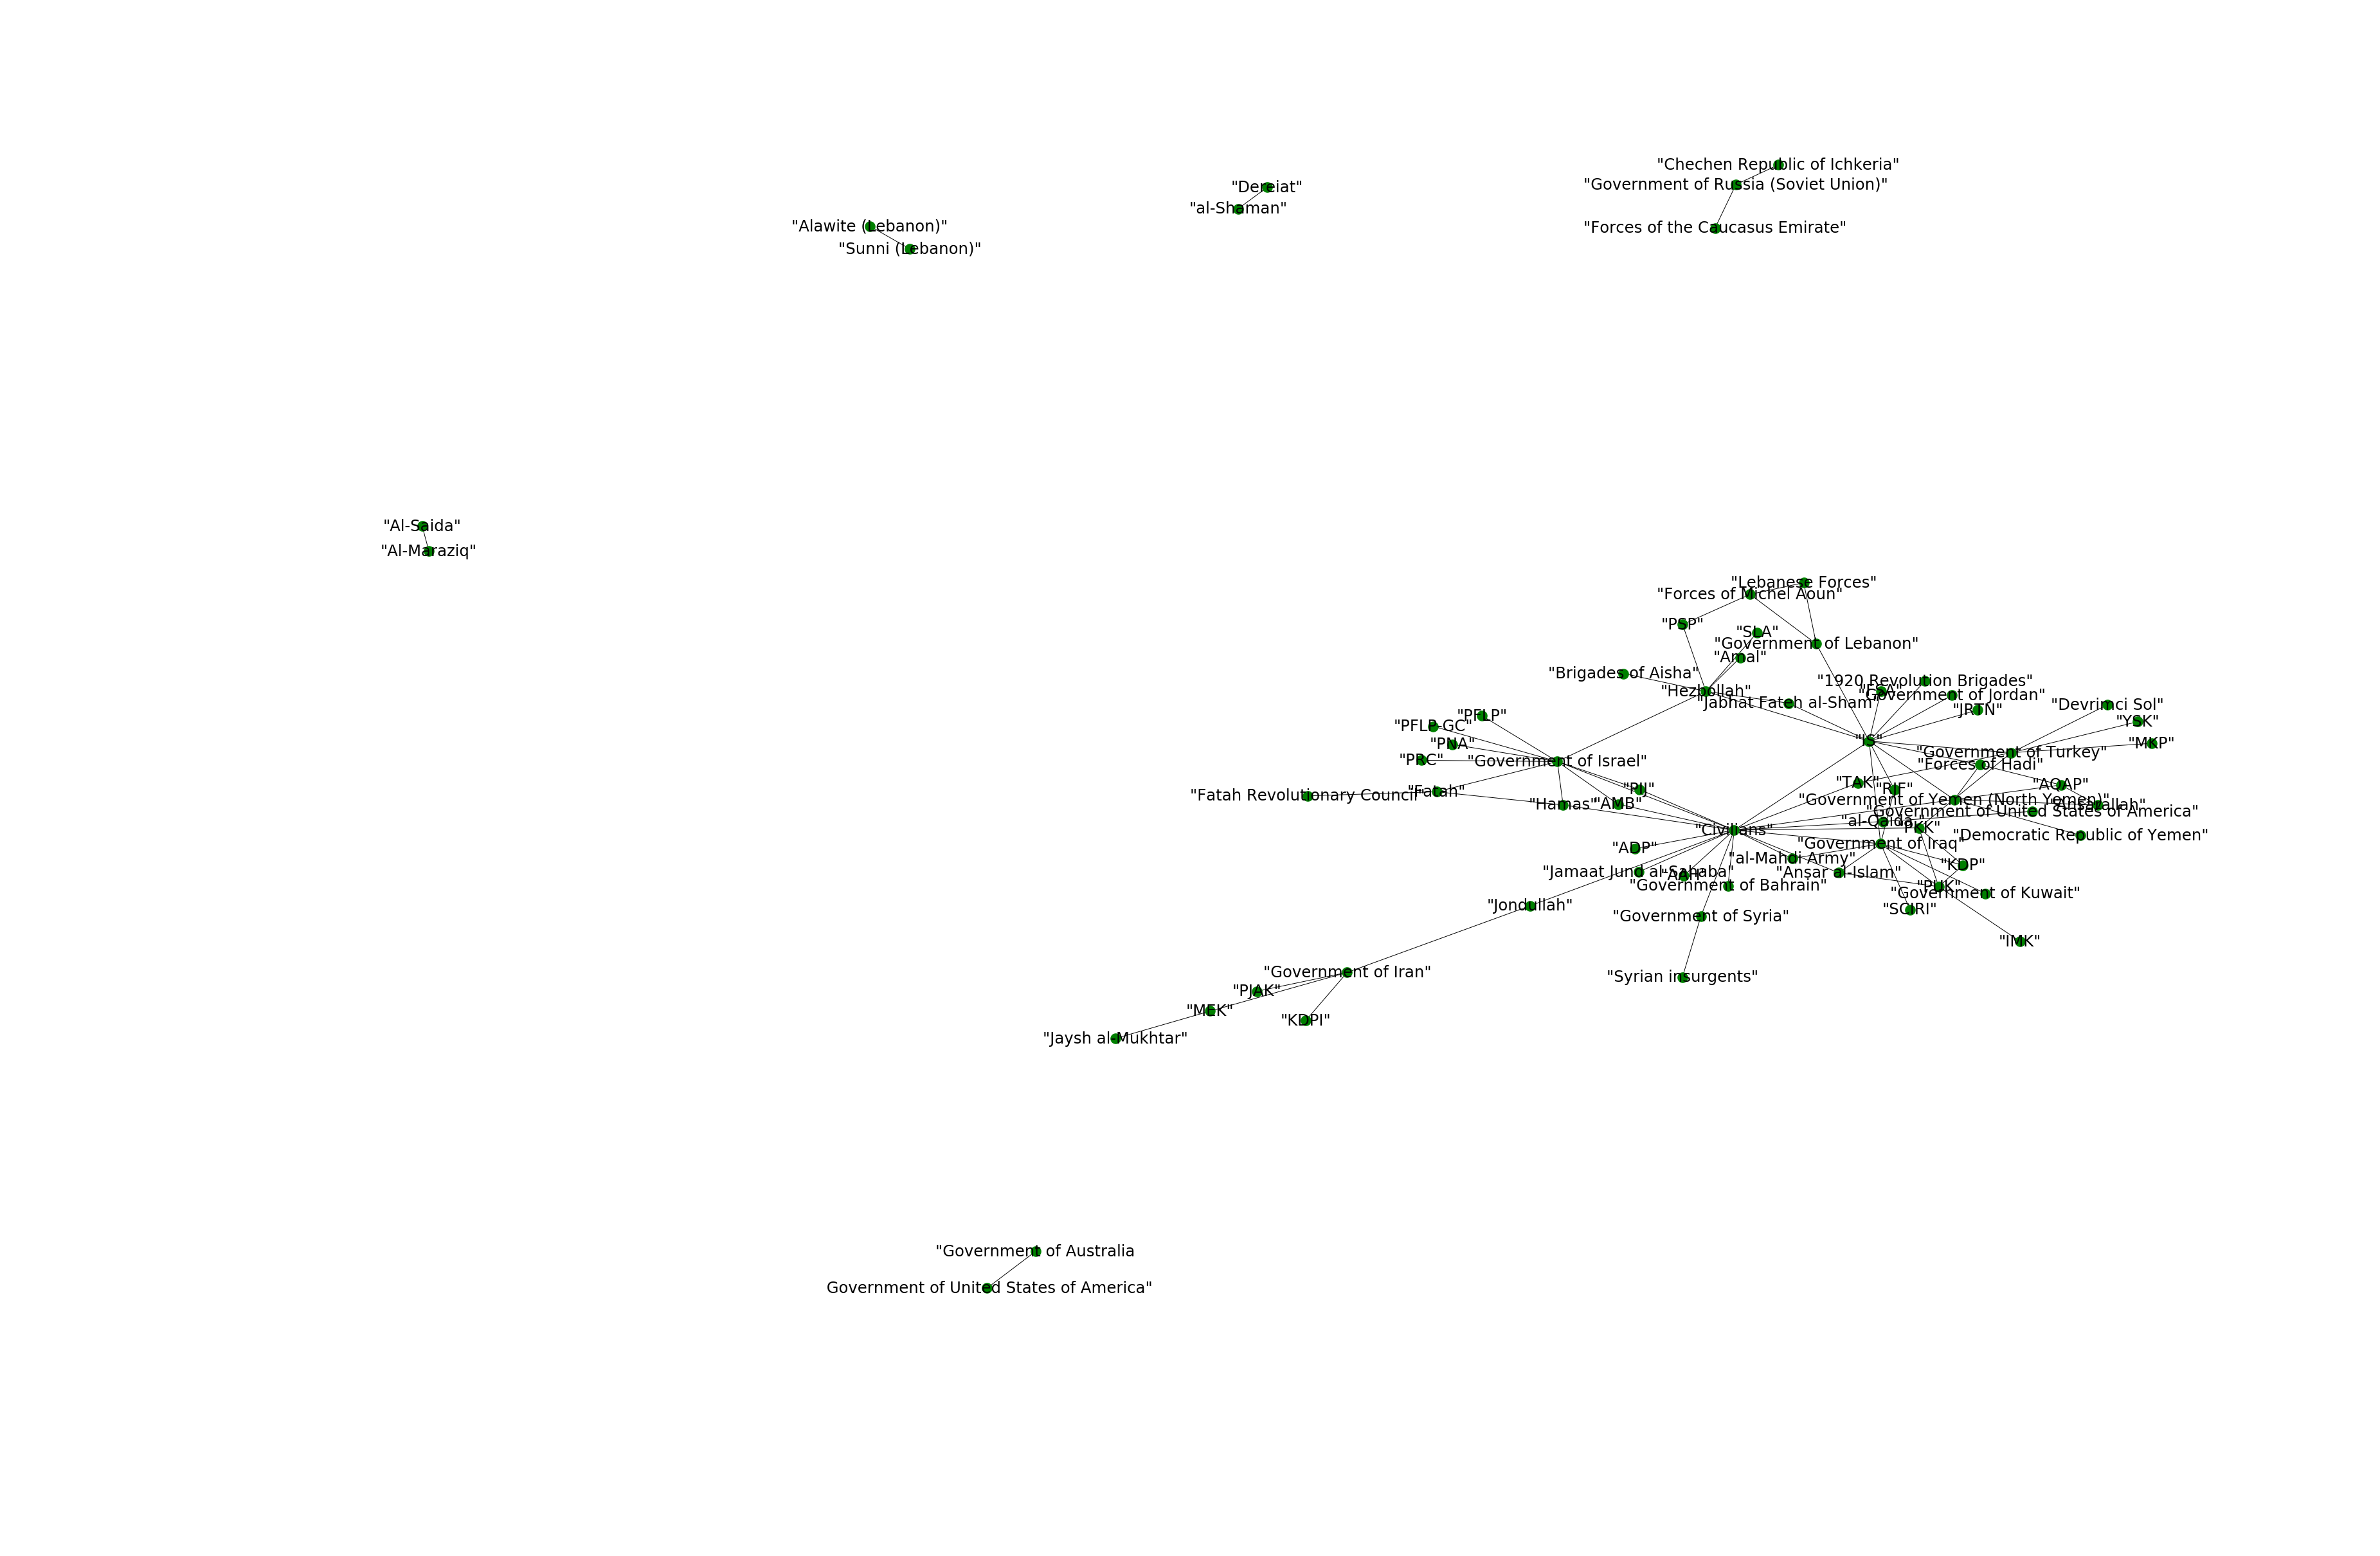

In [16]:
# plot networks for conflict parties in the Middle East with labels
plotnetworks_wl(B_me,'green') 

As we can see from this plot, central actors are the government of Yemen, Israel, Iraq, Daesh ("IS"), and Hezbollah.
From the border nodes, it seems as if there were some (accidental) clashes between armed forces of the USA and Australia. However, this is an artefact which is based on the visualization. One node is labelled "Government of Australia Government of United States of America" whereas the other node has no label.  

Another interesting point would be to consider one single country in this region. Since the data for Syria &mdash; the most current example &mdash; are not available at the moment via UCDP, I chose Iraq. It also represents a nice example with various interacting actors and may therefore serve as a good substitute.

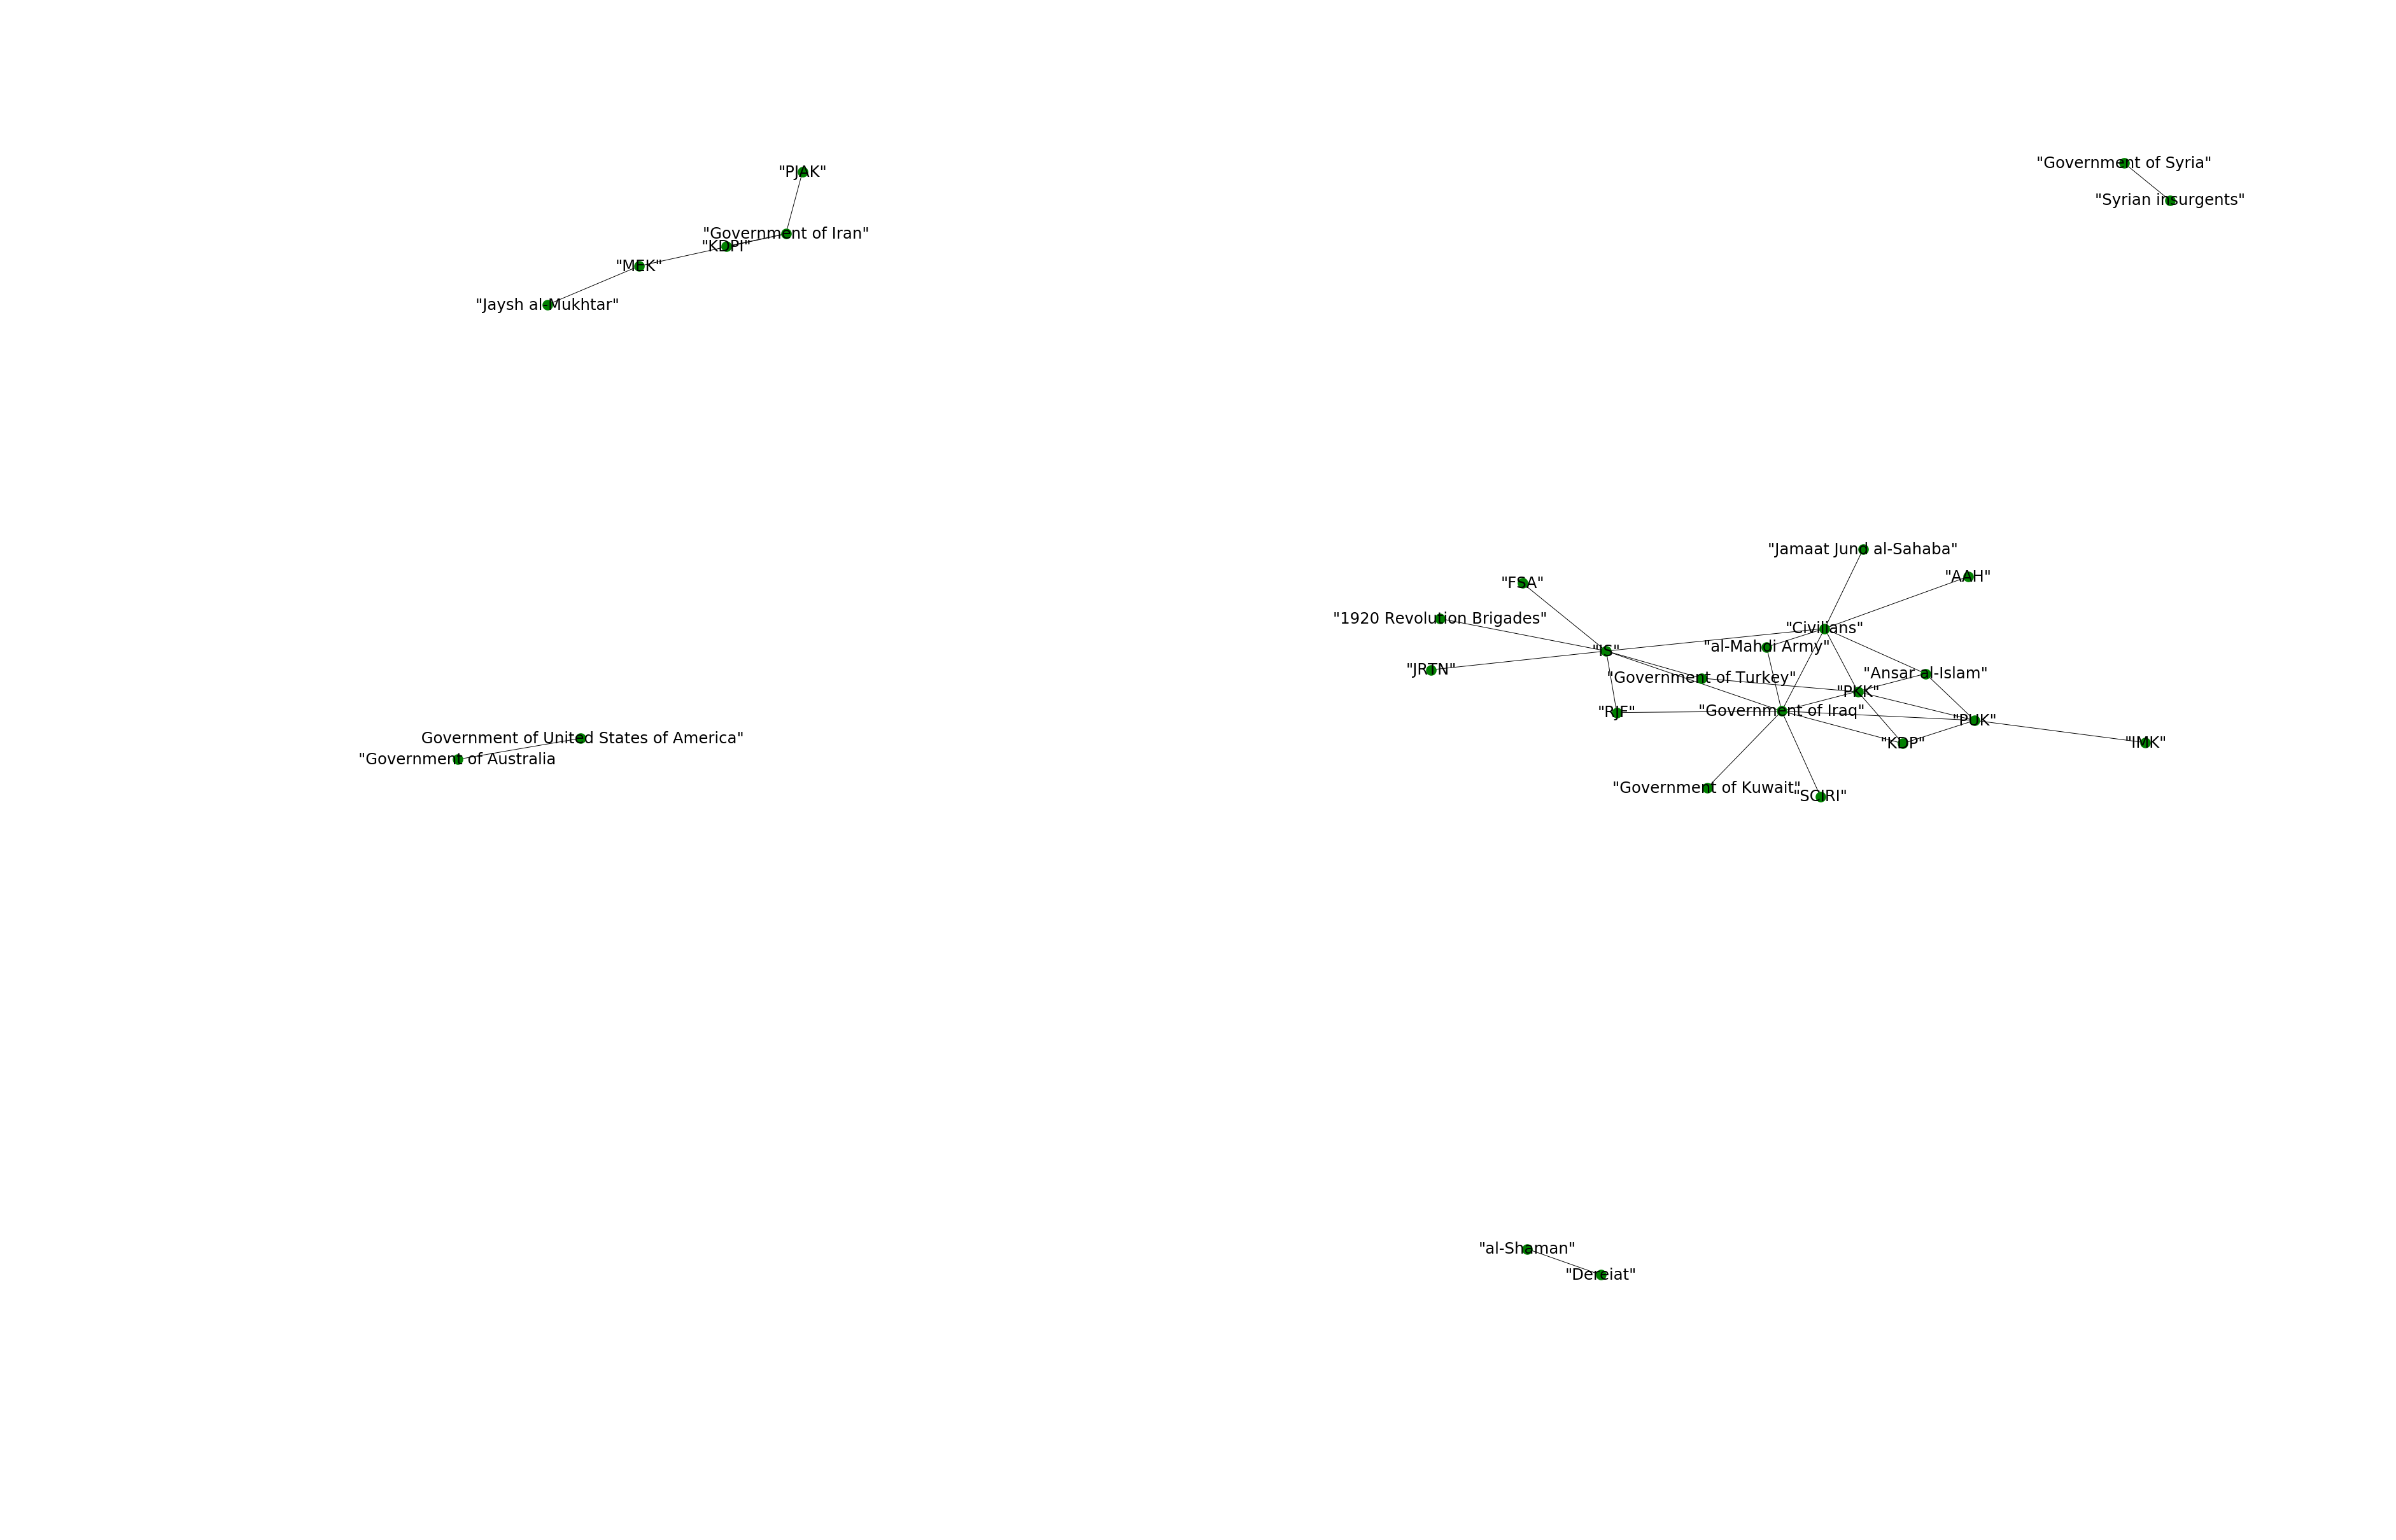

In [17]:
# plot networks for conflict parties in Iraq with labels
plotnetworks_wl(B_iraq,'green') 

As we can see from the visual network of Iraq, central actors are the government of Iraq and Turkey, Daesh ("IS") and "civilians". The networkx package allows us to further determine central actors with the betweeness centrality score.

In [18]:
nx.edge_betweenness_centrality(B_iraq,normalized=False)

{('"1920 Revolution Brigades"', '"IS"'): 17.0,
 ('"AAH"', '"Civilians"'): 17.0,
 ('"Ansar al-Islam"', '"Civilians"'): 8.5,
 ('"Ansar al-Islam"', '"PUK"'): 5.25,
 ('"Civilians"', '"IS"'): 21.783333333333335,
 ('"Civilians"', '"al-Mahdi Army"'): 7.166666666666666,
 ('"FSA"', '"IS"'): 17.0,
 ('"Government of Australia', ' Government of United States of America"'): 1.0,
 ('"Government of Iran"', '"KDPI"'): 4.0,
 ('"Government of Iran"', '"MEK"'): 6.0,
 ('"Government of Iraq"', '"Ansar al-Islam"'): 7.25,
 ('"Government of Iraq"', '"Civilians"'): 15.2,
 ('"Government of Iraq"', '"IS"'): 31.583333333333332,
 ('"Government of Iraq"', '"KDP"'): 12.2,
 ('"Government of Iraq"', '"PUK"'): 21.2,
 ('"Government of Iraq"', '"RJF"'): 10.1,
 ('"Government of Iraq"', '"SCIRI"'): 17.0,
 ('"Government of Iraq"', '"al-Mahdi Army"'): 9.833333333333332,
 ('"Government of Kuwait"', '"Government of Iraq"'): 17.0,
 ('"Government of Turkey"', '"IS"'): 12.866666666666667,
 ('"Government of Turkey"', '"PKK"'): 8.5

The output confirms our visual assumptions above. Central actors are "civilians", the government of Iraq, Turkey, and Daesh ("IS") because they have the highest values. Higher values stand for higher levels of centrality in the network.

### The Americas

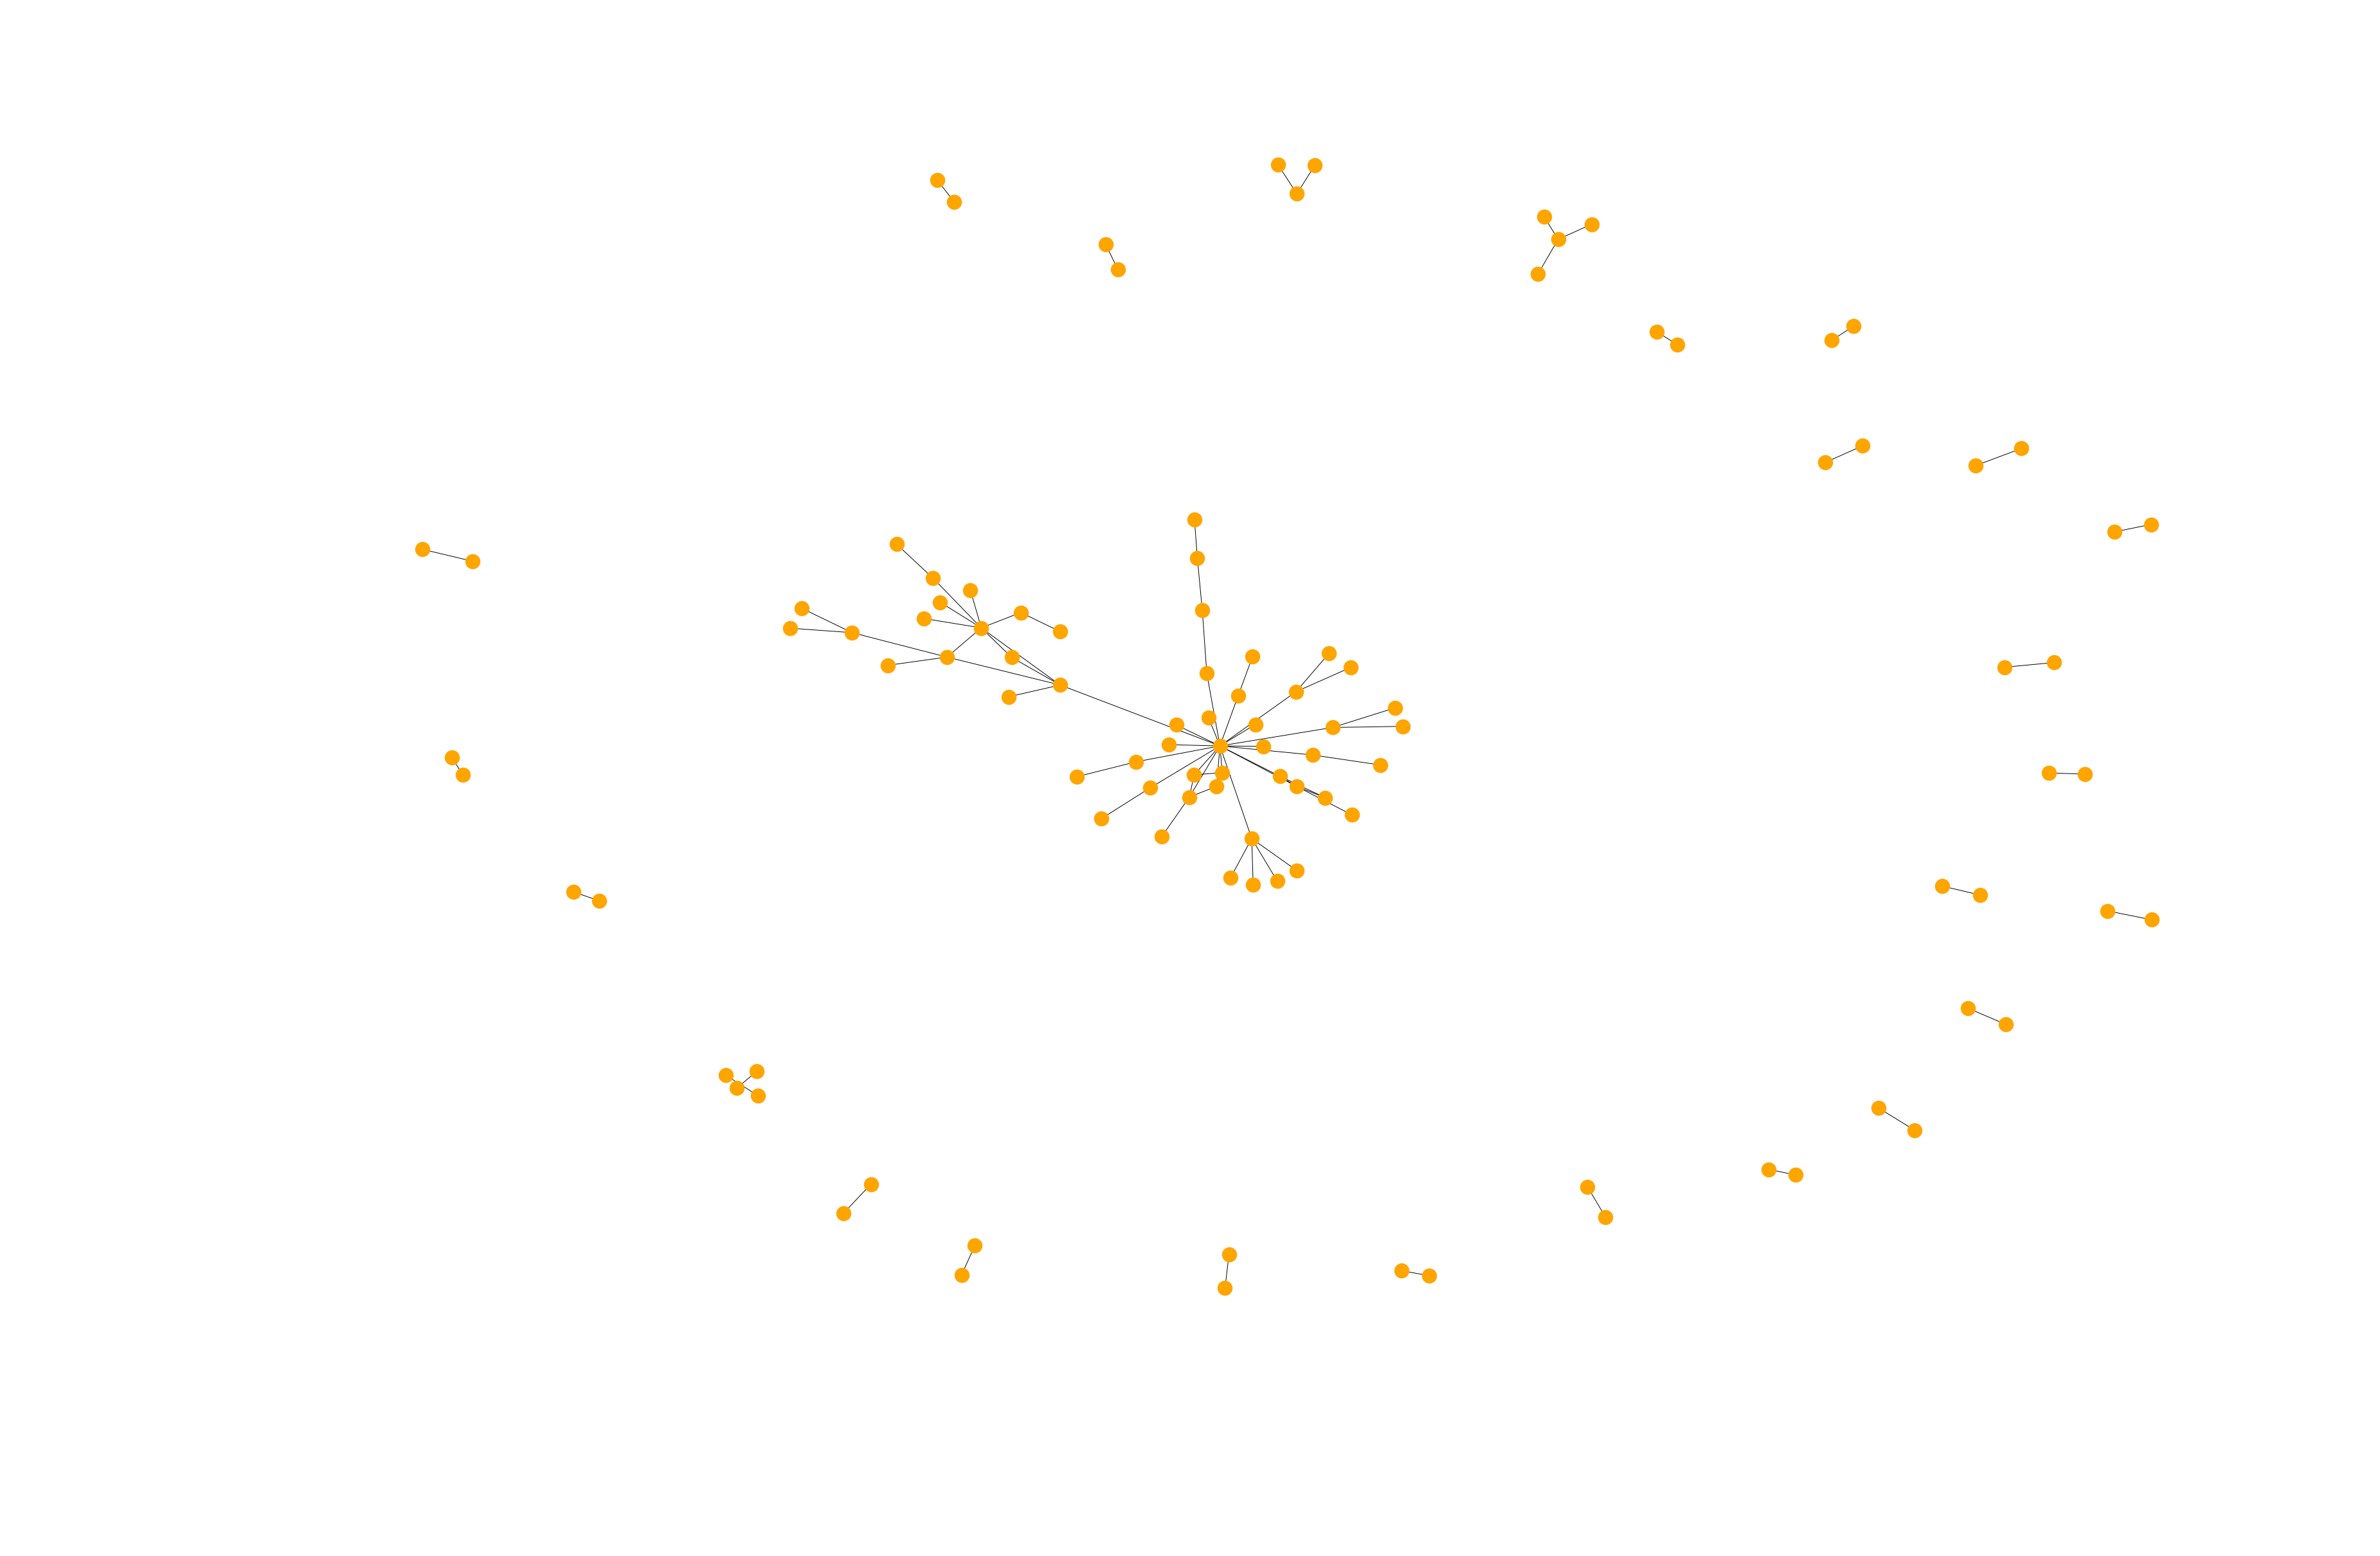

In [19]:
# plot networks for conflict parties in the Americas
plotnetworks(B_americas,'orange') 

The network for the Americas may be best described as a mixture of Sub-saharan Africa's and Middle East's network while it points more towards the network of Sub-saharan Africa. It shows a cluster in the middle and several warring units at the border.

### Asia

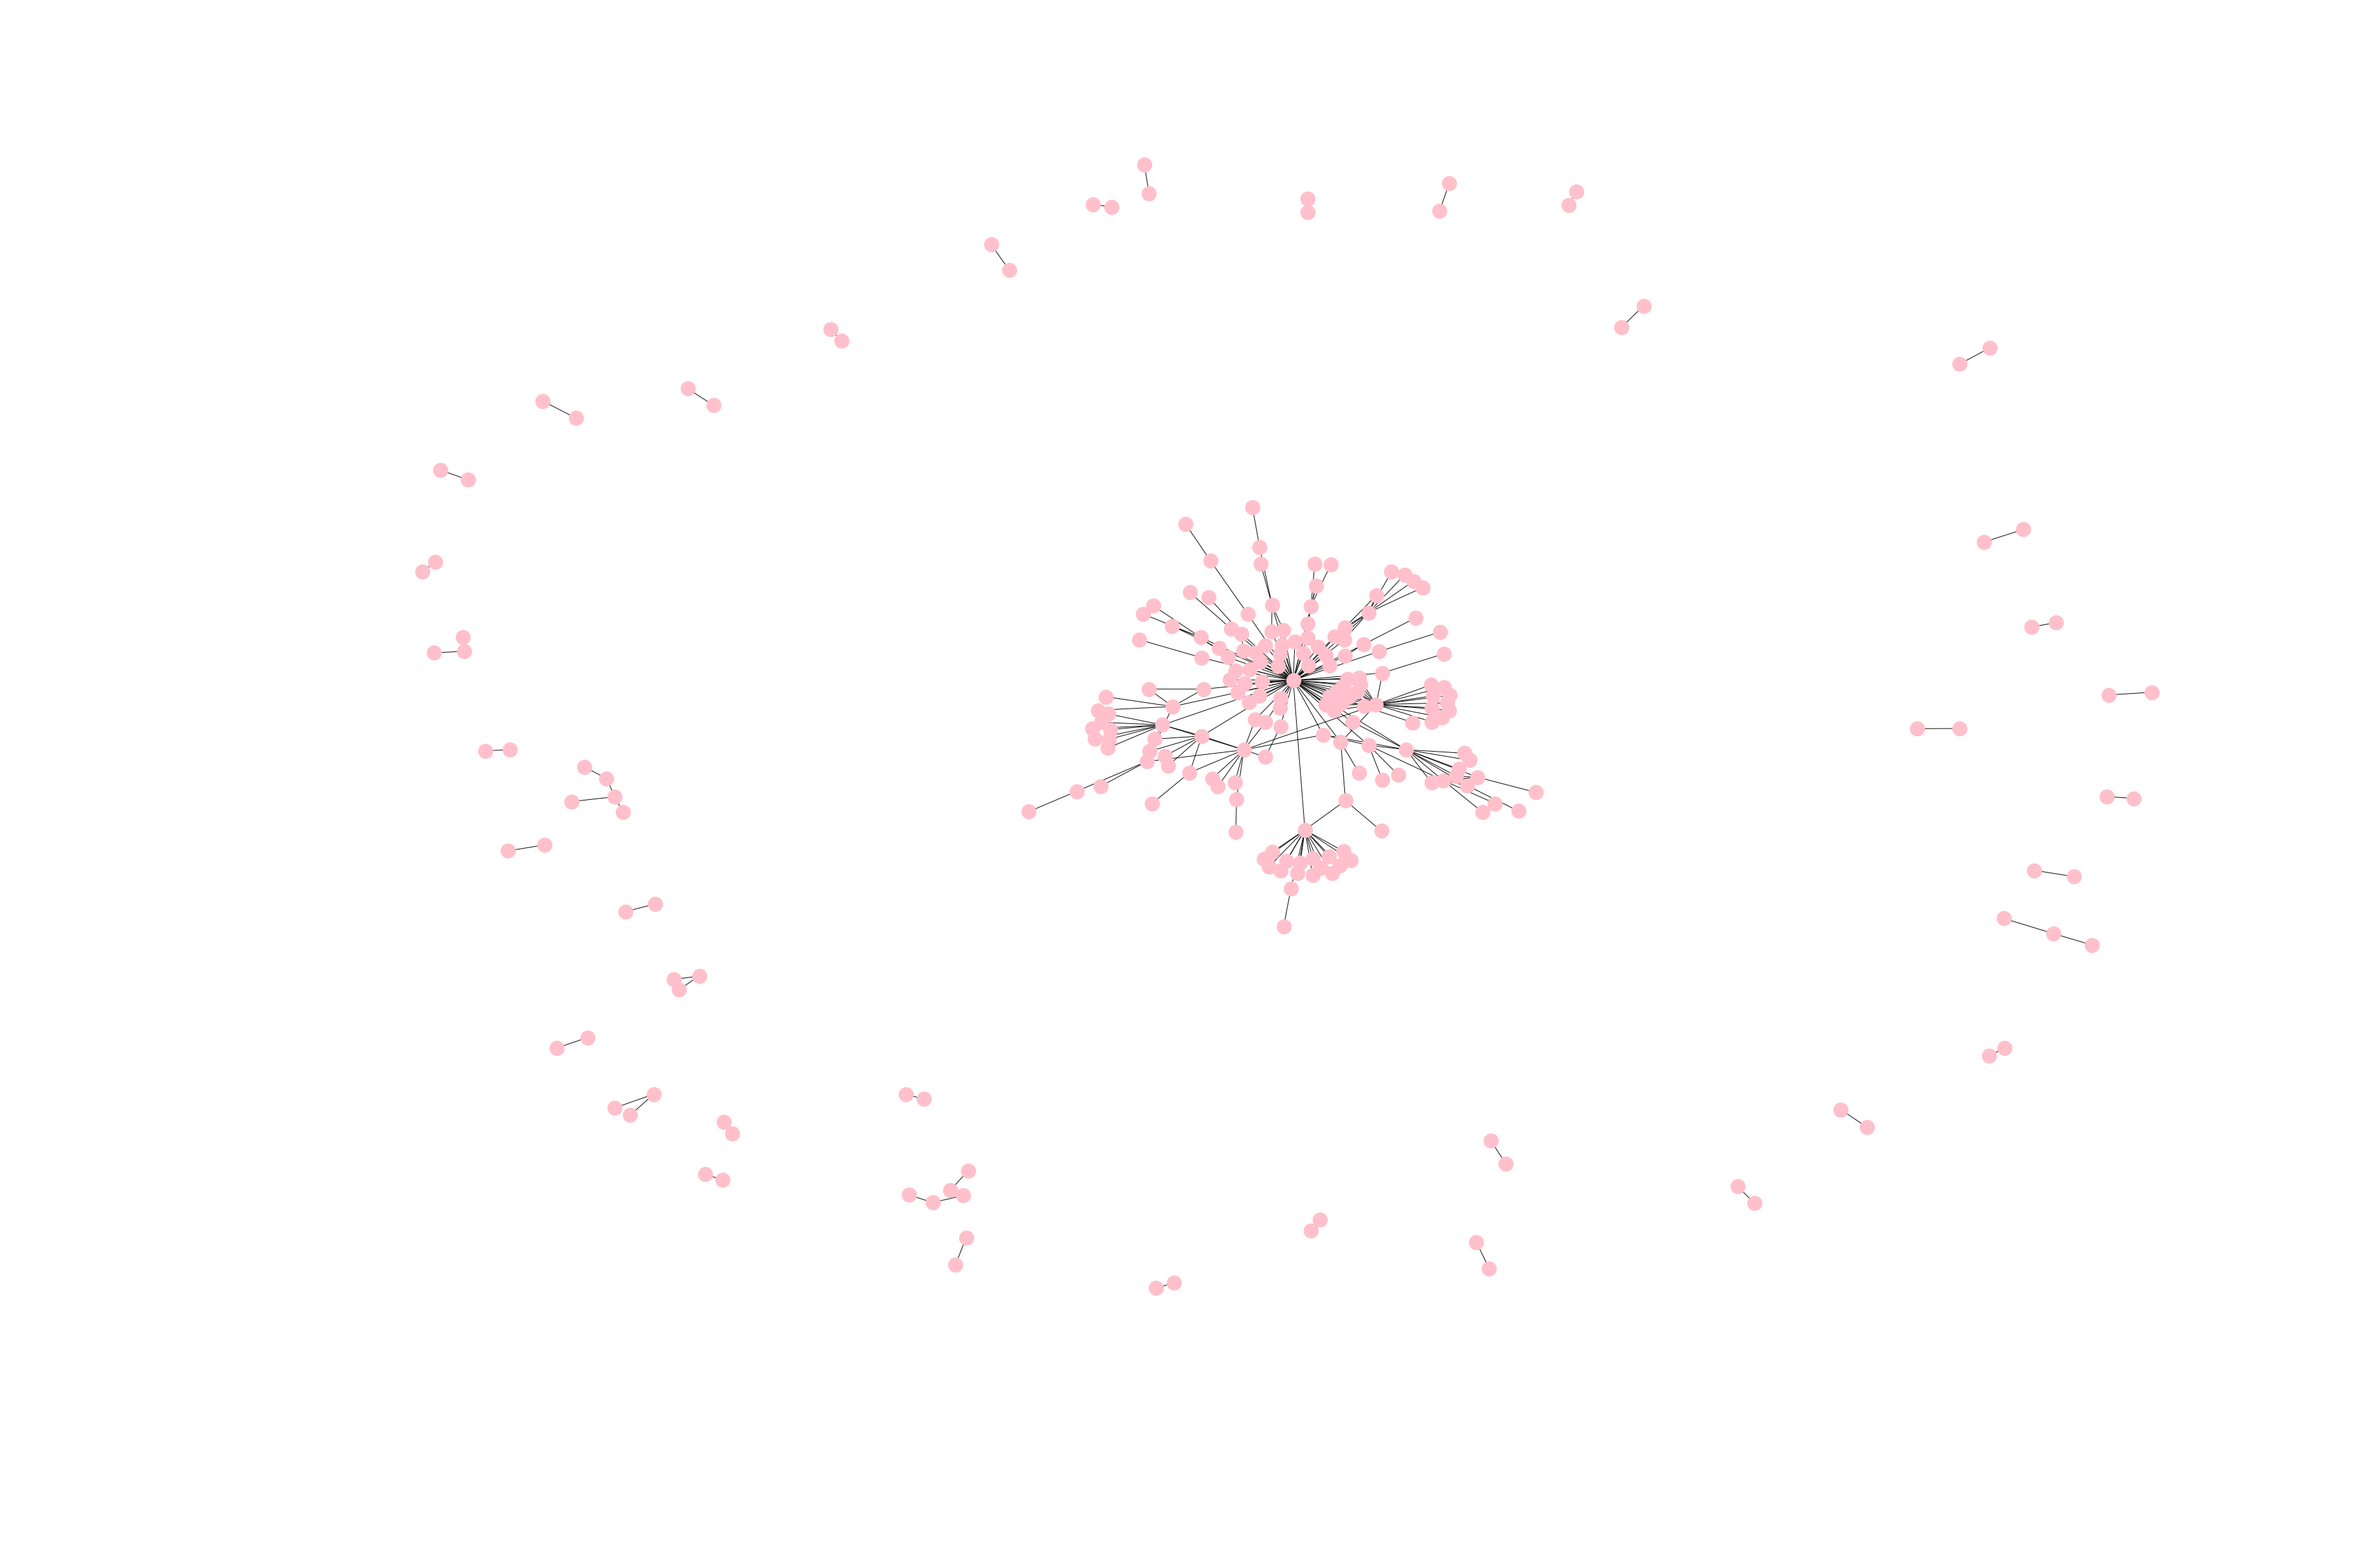

In [20]:
# plot networks for conflict parties in Asia
plotnetworks(B_asia,'pink') 

The Asian network is basically in line with the network of the Americas.

### Europe

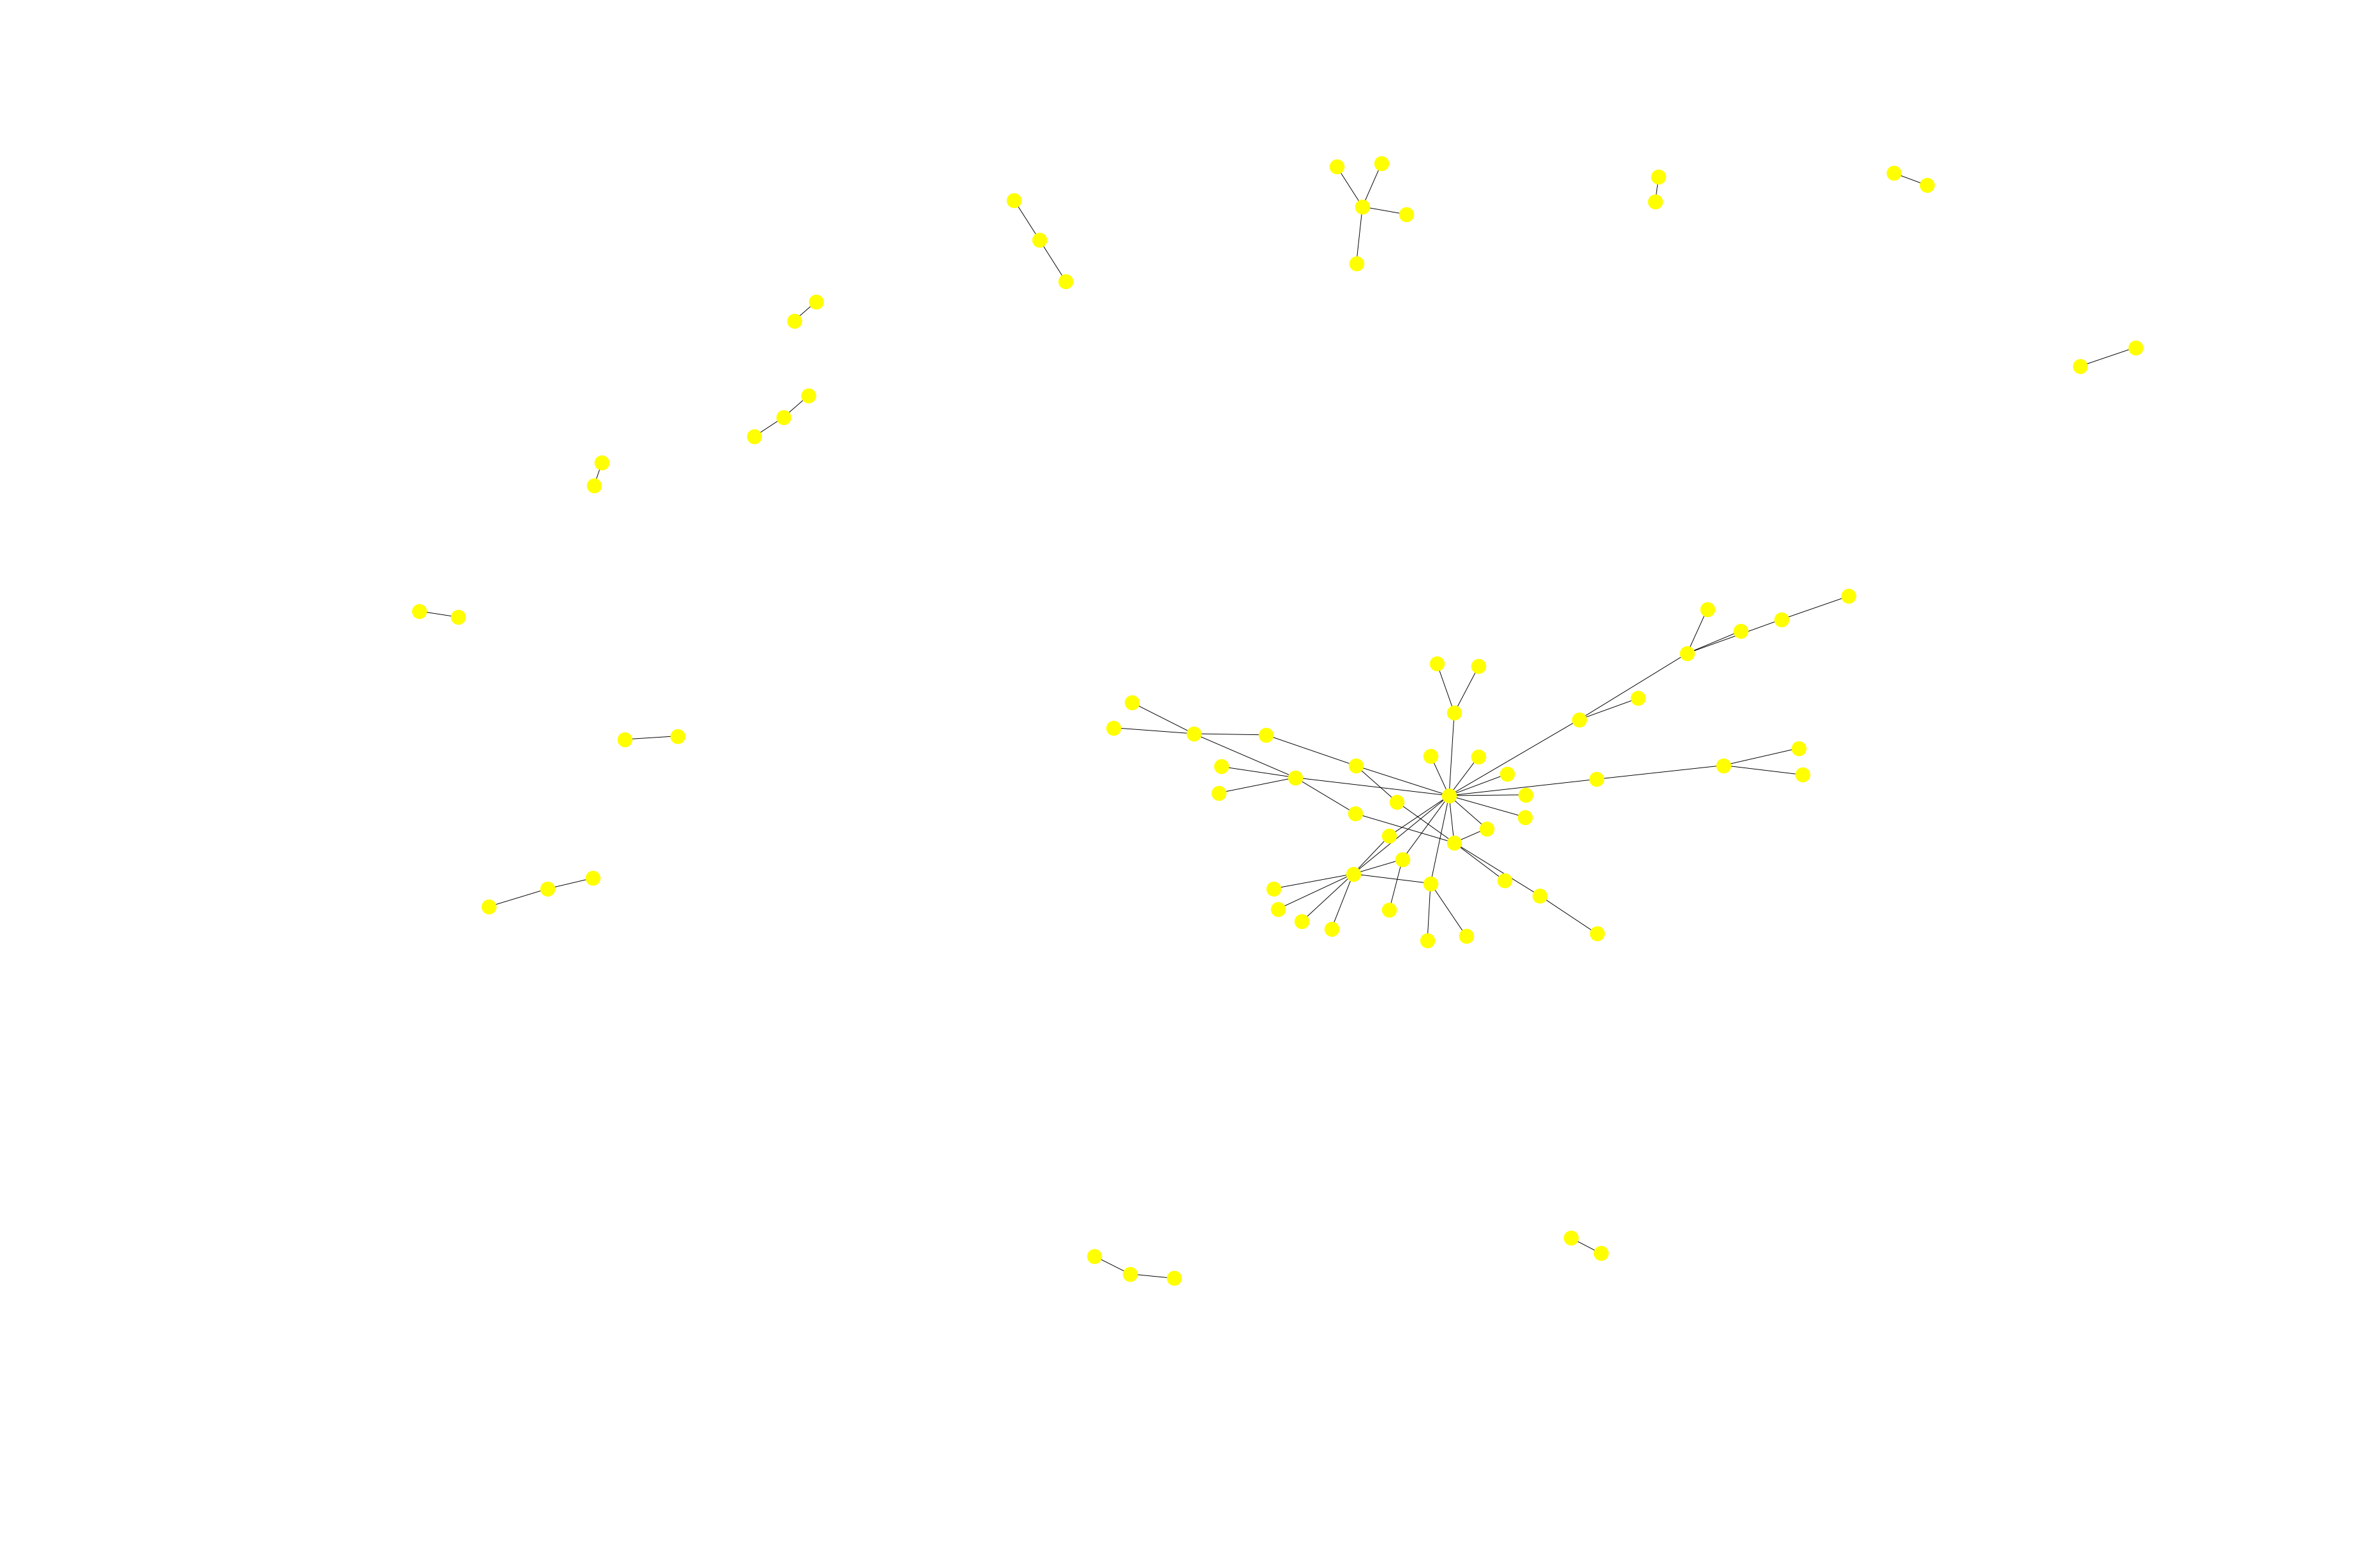

In [21]:
# plot networks for conflict parties in Europe
plotnetworks(B_europe,'yellow') 

Europe has &mdash; like the Middle East &mdash; only a few warring parties which may bias the general appearance of this network. Nevertheless, it shows a clear cluster in the middle with centralized actors and a few (also clustered) conflict parties at the border. While Europe, contrary to the Middle East or the other regions, cannot be described as a conflict-ridden region, the European network should be rather treated as an exceptional outlier and should not be included in the overall comparison of patterns. While it is still interesting to get a look at this region, I plotted it.

# Alternative approaches and outlook
I see this project as a first starting point for my explorative analysis of actors' networks. 
I initially wanted to get this insight by also plotting if the actors are non-state armed actors or the government. I produced some code which did not work &mdash; although I tried to solve the problem with bug fixing. <br />
I also tried to identify communities with the community package (based on the region variable of the dataset which is loaded to the dictionary (see line 3)) but it did not work either. Both codes are attached in the Appendix below.<br />
Adding to the provided networks, an interesting additional insight would be to include the level of violence the respective actors share (e.g., the number of battle-related death per edge). 

# Concluding remarks
As we can see in the networks above, both networks for Sub-saharan Africa and Middle East point in the expected direction. Sub-saharan Africa seems to drive the appearance of the overall network (including all conflict parties worldwide). All in all, the greatest outlier can be found in the Middle Eastern network. While the other networks provide a more or less similar pattern, the Middle Eastern only has a few warring parties which are highly centralized (clustered). This points towards high spill over effects across political borders in this region. When looking at a single country, here Iraq, in more detail, we are able to identify central actors quite easily. I define central actors as those with the greatest overlap in edges. The results offer a promising starting point for future analysis on the role of governments and non-state actors in conflict networks.

# Appendix

## Information on the nature of actors (state vs. non-state actors)

In [22]:
## Including information on state as an actor

spring_pos = nx.spring_layout(B)
government = B.node['state']

# If the node is in the shortest path, set it to red, else set it to white color
node_col = ['red' if B.node['state']==1 else 'white' for node in B.nodes()]
nx.draw_networkx(B, 
                 pos = spring_pos, 
                 node_color= node_col, 
                 with_labels = False, 
                 node_size = 5)

labels = {}    
for node in B.nodes():
    if node in hubs:
        #set the node name as the key and the label as its value 
        labels[node] = node
#set the argument 'with labels' to False so you have unlabeled graph
nx.draw(G, with_labels=False)
#Now only add labels to the nodes you require (the hubs in my case)
nx.draw_networkx_labels(G,pos,labels,font_size=16,font_color='r')

nx.draw(B, pos=pos, node_color='state', node_size=8, with_labels=False)

#set the argument 'with labels' to False so you have unlabeled graph
nx.draw(G, with_labels=False)

#Now only add labels to the nodes you require (the hubs in my case)
nx.draw_networkx_labels(G,pos,labels,font_size=16,font_color='r')

;

KeyError: 'state'

## Identifying communities in the network

In [ ]:
## Identify communities in the worldwide network

# A community is defined as the geographical region in this case

communities = community.best_partition(B)
values = [communities.get(node) for node in B.nodes()]
nx.draw_spring(B, 
               cmap = plt.get_cmap('jet'), 
               node_color = values, 
               node_size=30, 
               with_labels=False)

# create empty list for node colors
node_color = []

# for each node in the graph
for node in g.nodes(data=True):

# if the node has the attribute region 1 (Sub-saharan Africa)
    if '1' in node[1]['region']:
        node_color.append('blue')

# if the node has the attribute region 2 (the Americas)
    elif '2' in node[1]['region']:
        node_color.append('orange')

# if the node has the attribute region 3 (Asia)
    elif '3' in node[1]['region']:
        node_color.append('pink')

# if the node has the attribute region 4 (Europe)
    elif '4' in node[1]['region']:
        node_color.append('yellow')

# if the node has the attribute region 5 (Middle East)
    elif '5' in node[1]['region']:
        node_color.append('green')  

# draw graph with node attribute color
nx.draw(g, with_labels=False, node_size=25, node_color=node_color)

;